# Project: Wrangle and Analyze Data

## Table of Contents

* Introduction
* Data
* Gathering Data 
* Assessing Data (Quality & Tidiness)
* Cleaning Data (Define, Code & Test)
* Analyzing & Visualizing Data

## Introduction

Real-world data rarely comes clean. Using Python and its libraries, i will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. 

The dataset that i will be wrangling is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. WeRateDogs has over 4 million followers and has received international media coverage.

## Data

* Twitter Archive File
* Image Predictions File
* Additional Data via the Twitter API

In [1]:
# Import all packages
import numpy as np
import pandas as pd
import requests
import tweepy
import os
import time
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


## Gathering Data

**1. Twitter Archive File**

In [2]:
twitter_archive_file = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_file

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


**2. Image Predictions File**

In [3]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
    
with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)
    
image_predictions_file = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions_file

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


**3. Additional Data via the Twitter API**

In [4]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [5]:
tweet_ids = twitter_archive_file.tweet_id.values
len(tweet_ids)

2356

In [6]:
#Execution time
start = time.time()
#Lists
my_tweets_data =[]
missing_value = []

for tweet_id in twitter_archive_file['tweet_id']:
    try:
        my_tweets_data.append(api.get_status(tweet_id, tweet_mode = 'extended'))
        tweet_id = str(tweet_id)
        print(tweet_id)
    except Exception as e:
        tweet_id = int(tweet_id)
        missing_value.append(tweet_id)
        print(str(tweet_id) + "; " + str(e))

#Ececution time
end = time.time()
print(end - start)


892420643555336193; [{'code': 215, 'message': 'Bad Authentication data.'}]
892177421306343426; [{'code': 215, 'message': 'Bad Authentication data.'}]
891815181378084864; [{'code': 215, 'message': 'Bad Authentication data.'}]
891689557279858688; [{'code': 215, 'message': 'Bad Authentication data.'}]
891327558926688256; [{'code': 215, 'message': 'Bad Authentication data.'}]
891087950875897856; [{'code': 215, 'message': 'Bad Authentication data.'}]
890971913173991426; [{'code': 215, 'message': 'Bad Authentication data.'}]
890729181411237888; [{'code': 215, 'message': 'Bad Authentication data.'}]
890609185150312448; [{'code': 215, 'message': 'Bad Authentication data.'}]
890240255349198849; [{'code': 215, 'message': 'Bad Authentication data.'}]
890006608113172480; [{'code': 215, 'message': 'Bad Authentication data.'}]
889880896479866881; [{'code': 215, 'message': 'Bad Authentication data.'}]
889665388333682689; [{'code': 215, 'message': 'Bad Authentication data.'}]
889638837579907072; [{'co

871102520638267392; [{'code': 215, 'message': 'Bad Authentication data.'}]
871032628920680449; [{'code': 215, 'message': 'Bad Authentication data.'}]
870804317367881728; [{'code': 215, 'message': 'Bad Authentication data.'}]
870726314365509632; [{'code': 215, 'message': 'Bad Authentication data.'}]
870656317836468226; [{'code': 215, 'message': 'Bad Authentication data.'}]
870374049280663552; [{'code': 215, 'message': 'Bad Authentication data.'}]
870308999962521604; [{'code': 215, 'message': 'Bad Authentication data.'}]
870063196459192321; [{'code': 215, 'message': 'Bad Authentication data.'}]
869988702071779329; [{'code': 215, 'message': 'Bad Authentication data.'}]
869772420881756160; [{'code': 215, 'message': 'Bad Authentication data.'}]
869702957897576449; [{'code': 215, 'message': 'Bad Authentication data.'}]
869596645499047938; [{'code': 215, 'message': 'Bad Authentication data.'}]
869227993411051520; [{'code': 215, 'message': 'Bad Authentication data.'}]
868880397819494401; [{'co

849776966551130114; [{'code': 215, 'message': 'Bad Authentication data.'}]
849668094696017920; [{'code': 215, 'message': 'Bad Authentication data.'}]
849412302885593088; [{'code': 215, 'message': 'Bad Authentication data.'}]
849336543269576704; [{'code': 215, 'message': 'Bad Authentication data.'}]
849051919805034497; [{'code': 215, 'message': 'Bad Authentication data.'}]
848690551926992896; [{'code': 215, 'message': 'Bad Authentication data.'}]
848324959059550208; [{'code': 215, 'message': 'Bad Authentication data.'}]
848213670039564288; [{'code': 215, 'message': 'Bad Authentication data.'}]
848212111729840128; [{'code': 215, 'message': 'Bad Authentication data.'}]
847978865427394560; [{'code': 215, 'message': 'Bad Authentication data.'}]
847971574464610304; [{'code': 215, 'message': 'Bad Authentication data.'}]
847962785489326080; [{'code': 215, 'message': 'Bad Authentication data.'}]
847842811428974592; [{'code': 215, 'message': 'Bad Authentication data.'}]
847617282490613760; [{'co

832769181346996225; [{'code': 215, 'message': 'Bad Authentication data.'}]
832757312314028032; [{'code': 215, 'message': 'Bad Authentication data.'}]
832682457690300417; [{'code': 215, 'message': 'Bad Authentication data.'}]
832645525019123713; [{'code': 215, 'message': 'Bad Authentication data.'}]
832636094638288896; [{'code': 215, 'message': 'Bad Authentication data.'}]
832397543355072512; [{'code': 215, 'message': 'Bad Authentication data.'}]
832369877331693569; [{'code': 215, 'message': 'Bad Authentication data.'}]
832273440279240704; [{'code': 215, 'message': 'Bad Authentication data.'}]
832215909146226688; [{'code': 215, 'message': 'Bad Authentication data.'}]
832215726631055365; [{'code': 215, 'message': 'Bad Authentication data.'}]
832088576586297345; [{'code': 215, 'message': 'Bad Authentication data.'}]
832040443403784192; [{'code': 215, 'message': 'Bad Authentication data.'}]
832032802820481025; [{'code': 215, 'message': 'Bad Authentication data.'}]
831939777352105988; [{'co

819347104292290561; [{'code': 215, 'message': 'Bad Authentication data.'}]
819238181065359361; [{'code': 215, 'message': 'Bad Authentication data.'}]
819227688460238848; [{'code': 215, 'message': 'Bad Authentication data.'}]
819015337530290176; [{'code': 215, 'message': 'Bad Authentication data.'}]
819015331746349057; [{'code': 215, 'message': 'Bad Authentication data.'}]
819006400881917954; [{'code': 215, 'message': 'Bad Authentication data.'}]
819004803107983360; [{'code': 215, 'message': 'Bad Authentication data.'}]
818646164899774465; [{'code': 215, 'message': 'Bad Authentication data.'}]
818627210458333184; [{'code': 215, 'message': 'Bad Authentication data.'}]
818614493328580609; [{'code': 215, 'message': 'Bad Authentication data.'}]
818588835076603904; [{'code': 215, 'message': 'Bad Authentication data.'}]
818536468981415936; [{'code': 215, 'message': 'Bad Authentication data.'}]
818307523543449600; [{'code': 215, 'message': 'Bad Authentication data.'}]
818259473185828864; [{'co

804026241225523202; [{'code': 215, 'message': 'Bad Authentication data.'}]
803773340896923648; [{'code': 215, 'message': 'Bad Authentication data.'}]
803692223237865472; [{'code': 215, 'message': 'Bad Authentication data.'}]
803638050916102144; [{'code': 215, 'message': 'Bad Authentication data.'}]
803380650405482500; [{'code': 215, 'message': 'Bad Authentication data.'}]
803321560782307329; [{'code': 215, 'message': 'Bad Authentication data.'}]
803276597545603072; [{'code': 215, 'message': 'Bad Authentication data.'}]
802952499103731712; [{'code': 215, 'message': 'Bad Authentication data.'}]
802624713319034886; [{'code': 215, 'message': 'Bad Authentication data.'}]
802600418706604034; [{'code': 215, 'message': 'Bad Authentication data.'}]
802572683846291456; [{'code': 215, 'message': 'Bad Authentication data.'}]
802323869084381190; [{'code': 215, 'message': 'Bad Authentication data.'}]
802265048156610565; [{'code': 215, 'message': 'Bad Authentication data.'}]
802247111496568832; [{'co

790946055508652032; [{'code': 215, 'message': 'Bad Authentication data.'}]
790723298204217344; [{'code': 215, 'message': 'Bad Authentication data.'}]
790698755171364864; [{'code': 215, 'message': 'Bad Authentication data.'}]
790581949425475584; [{'code': 215, 'message': 'Bad Authentication data.'}]
790337589677002753; [{'code': 215, 'message': 'Bad Authentication data.'}]
790277117346975746; [{'code': 215, 'message': 'Bad Authentication data.'}]
790227638568808452; [{'code': 215, 'message': 'Bad Authentication data.'}]
789986466051088384; [{'code': 215, 'message': 'Bad Authentication data.'}]
789960241177853952; [{'code': 215, 'message': 'Bad Authentication data.'}]
789903600034189313; [{'code': 215, 'message': 'Bad Authentication data.'}]
789628658055020548; [{'code': 215, 'message': 'Bad Authentication data.'}]
789599242079838210; [{'code': 215, 'message': 'Bad Authentication data.'}]
789530877013393408; [{'code': 215, 'message': 'Bad Authentication data.'}]
789314372632018944; [{'co

776249906839351296; [{'code': 215, 'message': 'Bad Authentication data.'}]
776218204058357768; [{'code': 215, 'message': 'Bad Authentication data.'}]
776201521193218049; [{'code': 215, 'message': 'Bad Authentication data.'}]
776113305656188928; [{'code': 215, 'message': 'Bad Authentication data.'}]
776088319444877312; [{'code': 215, 'message': 'Bad Authentication data.'}]
775898661951791106; [{'code': 215, 'message': 'Bad Authentication data.'}]
775842724423557120; [{'code': 215, 'message': 'Bad Authentication data.'}]
775733305207554048; [{'code': 215, 'message': 'Bad Authentication data.'}]
775729183532220416; [{'code': 215, 'message': 'Bad Authentication data.'}]
775364825476165632; [{'code': 215, 'message': 'Bad Authentication data.'}]
775350846108426240; [{'code': 215, 'message': 'Bad Authentication data.'}]
775096608509886464; [{'code': 215, 'message': 'Bad Authentication data.'}]
775085132600442880; [{'code': 215, 'message': 'Bad Authentication data.'}]
774757898236878852; [{'co

760252756032651264; [{'code': 215, 'message': 'Bad Authentication data.'}]
760190180481531904; [{'code': 215, 'message': 'Bad Authentication data.'}]
760153949710192640; [{'code': 215, 'message': 'Bad Authentication data.'}]
759943073749200896; [{'code': 215, 'message': 'Bad Authentication data.'}]
759923798737051648; [{'code': 215, 'message': 'Bad Authentication data.'}]
759846353224826880; [{'code': 215, 'message': 'Bad Authentication data.'}]
759793422261743616; [{'code': 215, 'message': 'Bad Authentication data.'}]
759566828574212096; [{'code': 215, 'message': 'Bad Authentication data.'}]
759557299618865152; [{'code': 215, 'message': 'Bad Authentication data.'}]
759447681597108224; [{'code': 215, 'message': 'Bad Authentication data.'}]
759446261539934208; [{'code': 215, 'message': 'Bad Authentication data.'}]
759197388317847553; [{'code': 215, 'message': 'Bad Authentication data.'}]
759159934323924993; [{'code': 215, 'message': 'Bad Authentication data.'}]
759099523532779520; [{'co

748575535303884801; [{'code': 215, 'message': 'Bad Authentication data.'}]
748568946752774144; [{'code': 215, 'message': 'Bad Authentication data.'}]
748346686624440324; [{'code': 215, 'message': 'Bad Authentication data.'}]
748337862848962560; [{'code': 215, 'message': 'Bad Authentication data.'}]
748324050481647620; [{'code': 215, 'message': 'Bad Authentication data.'}]
748307329658011649; [{'code': 215, 'message': 'Bad Authentication data.'}]
748220828303695873; [{'code': 215, 'message': 'Bad Authentication data.'}]
747963614829678593; [{'code': 215, 'message': 'Bad Authentication data.'}]
747933425676525569; [{'code': 215, 'message': 'Bad Authentication data.'}]
747885874273214464; [{'code': 215, 'message': 'Bad Authentication data.'}]
747844099428986880; [{'code': 215, 'message': 'Bad Authentication data.'}]
747816857231626240; [{'code': 215, 'message': 'Bad Authentication data.'}]
747651430853525504; [{'code': 215, 'message': 'Bad Authentication data.'}]
747648653817413632; [{'co

735256018284875776; [{'code': 215, 'message': 'Bad Authentication data.'}]
735137028879360001; [{'code': 215, 'message': 'Bad Authentication data.'}]
734912297295085568; [{'code': 215, 'message': 'Bad Authentication data.'}]
734787690684657664; [{'code': 215, 'message': 'Bad Authentication data.'}]
734776360183431168; [{'code': 215, 'message': 'Bad Authentication data.'}]
734559631394082816; [{'code': 215, 'message': 'Bad Authentication data.'}]
733828123016450049; [{'code': 215, 'message': 'Bad Authentication data.'}]
733822306246479872; [{'code': 215, 'message': 'Bad Authentication data.'}]
733482008106668032; [{'code': 215, 'message': 'Bad Authentication data.'}]
733460102733135873; [{'code': 215, 'message': 'Bad Authentication data.'}]
733109485275860992; [{'code': 215, 'message': 'Bad Authentication data.'}]
732732193018155009; [{'code': 215, 'message': 'Bad Authentication data.'}]
732726085725589504; [{'code': 215, 'message': 'Bad Authentication data.'}]
732585889486888962; [{'co

715220193576927233; [{'code': 215, 'message': 'Bad Authentication data.'}]
715200624753819648; [{'code': 215, 'message': 'Bad Authentication data.'}]
715009755312439296; [{'code': 215, 'message': 'Bad Authentication data.'}]
714982300363173890; [{'code': 215, 'message': 'Bad Authentication data.'}]
714962719905021952; [{'code': 215, 'message': 'Bad Authentication data.'}]
714957620017307648; [{'code': 215, 'message': 'Bad Authentication data.'}]
714631576617938945; [{'code': 215, 'message': 'Bad Authentication data.'}]
714606013974974464; [{'code': 215, 'message': 'Bad Authentication data.'}]
714485234495041536; [{'code': 215, 'message': 'Bad Authentication data.'}]
714258258790387713; [{'code': 215, 'message': 'Bad Authentication data.'}]
714251586676113411; [{'code': 215, 'message': 'Bad Authentication data.'}]
714214115368108032; [{'code': 215, 'message': 'Bad Authentication data.'}]
714141408463036416; [{'code': 215, 'message': 'Bad Authentication data.'}]
713919462244790272; [{'co

706169069255446529; [{'code': 215, 'message': 'Bad Authentication data.'}]
706166467411222528; [{'code': 215, 'message': 'Bad Authentication data.'}]
706153300320784384; [{'code': 215, 'message': 'Bad Authentication data.'}]
705975130514706432; [{'code': 215, 'message': 'Bad Authentication data.'}]
705970349788291072; [{'code': 215, 'message': 'Bad Authentication data.'}]
705898680587526145; [{'code': 215, 'message': 'Bad Authentication data.'}]
705786532653883392; [{'code': 215, 'message': 'Bad Authentication data.'}]
705591895322394625; [{'code': 215, 'message': 'Bad Authentication data.'}]
705475953783398401; [{'code': 215, 'message': 'Bad Authentication data.'}]
705442520700944385; [{'code': 215, 'message': 'Bad Authentication data.'}]
705428427625635840; [{'code': 215, 'message': 'Bad Authentication data.'}]
705239209544720384; [{'code': 215, 'message': 'Bad Authentication data.'}]
705223444686888960; [{'code': 215, 'message': 'Bad Authentication data.'}]
705102439679201280; [{'co

697270446429966336; [{'code': 215, 'message': 'Bad Authentication data.'}]
697259378236399616; [{'code': 215, 'message': 'Bad Authentication data.'}]
697255105972801536; [{'code': 215, 'message': 'Bad Authentication data.'}]
697242256848379904; [{'code': 215, 'message': 'Bad Authentication data.'}]
696900204696625153; [{'code': 215, 'message': 'Bad Authentication data.'}]
696894894812565505; [{'code': 215, 'message': 'Bad Authentication data.'}]
696886256886657024; [{'code': 215, 'message': 'Bad Authentication data.'}]
696877980375769088; [{'code': 215, 'message': 'Bad Authentication data.'}]
696754882863349760; [{'code': 215, 'message': 'Bad Authentication data.'}]
696744641916489729; [{'code': 215, 'message': 'Bad Authentication data.'}]
696713835009417216; [{'code': 215, 'message': 'Bad Authentication data.'}]
696518437233913856; [{'code': 215, 'message': 'Bad Authentication data.'}]
696490539101908992; [{'code': 215, 'message': 'Bad Authentication data.'}]
696488710901260288; [{'co

689289219123089408; [{'code': 215, 'message': 'Bad Authentication data.'}]
689283819090870273; [{'code': 215, 'message': 'Bad Authentication data.'}]
689280876073582592; [{'code': 215, 'message': 'Bad Authentication data.'}]
689275259254616065; [{'code': 215, 'message': 'Bad Authentication data.'}]
689255633275777024; [{'code': 215, 'message': 'Bad Authentication data.'}]
689154315265683456; [{'code': 215, 'message': 'Bad Authentication data.'}]
689143371370250240; [{'code': 215, 'message': 'Bad Authentication data.'}]
688916208532455424; [{'code': 215, 'message': 'Bad Authentication data.'}]
688908934925697024; [{'code': 215, 'message': 'Bad Authentication data.'}]
688898160958271489; [{'code': 215, 'message': 'Bad Authentication data.'}]
688894073864884227; [{'code': 215, 'message': 'Bad Authentication data.'}]
688828561667567616; [{'code': 215, 'message': 'Bad Authentication data.'}]
688804835492233216; [{'code': 215, 'message': 'Bad Authentication data.'}]
688789766343622656; [{'co

683357973142474752; [{'code': 215, 'message': 'Bad Authentication data.'}]
683142553609318400; [{'code': 215, 'message': 'Bad Authentication data.'}]
683111407806746624; [{'code': 215, 'message': 'Bad Authentication data.'}]
683098815881154561; [{'code': 215, 'message': 'Bad Authentication data.'}]
683078886620553216; [{'code': 215, 'message': 'Bad Authentication data.'}]
683030066213818368; [{'code': 215, 'message': 'Bad Authentication data.'}]
682962037429899265; [{'code': 215, 'message': 'Bad Authentication data.'}]
682808988178739200; [{'code': 215, 'message': 'Bad Authentication data.'}]
682788441537560576; [{'code': 215, 'message': 'Bad Authentication data.'}]
682750546109968385; [{'code': 215, 'message': 'Bad Authentication data.'}]
682697186228989953; [{'code': 215, 'message': 'Bad Authentication data.'}]
682662431982772225; [{'code': 215, 'message': 'Bad Authentication data.'}]
682638830361513985; [{'code': 215, 'message': 'Bad Authentication data.'}]
682429480204398592; [{'co

678399652199309312; [{'code': 215, 'message': 'Bad Authentication data.'}]
678396796259975168; [{'code': 215, 'message': 'Bad Authentication data.'}]
678389028614488064; [{'code': 215, 'message': 'Bad Authentication data.'}]
678380236862578688; [{'code': 215, 'message': 'Bad Authentication data.'}]
678341075375947776; [{'code': 215, 'message': 'Bad Authentication data.'}]
678334497360859136; [{'code': 215, 'message': 'Bad Authentication data.'}]
678278586130948096; [{'code': 215, 'message': 'Bad Authentication data.'}]
678255464182861824; [{'code': 215, 'message': 'Bad Authentication data.'}]
678023323247357953; [{'code': 215, 'message': 'Bad Authentication data.'}]
678021115718029313; [{'code': 215, 'message': 'Bad Authentication data.'}]
677961670166224897; [{'code': 215, 'message': 'Bad Authentication data.'}]
677918531514703872; [{'code': 215, 'message': 'Bad Authentication data.'}]
677895101218201600; [{'code': 215, 'message': 'Bad Authentication data.'}]
677716515794329600; [{'co

675111688094527488; [{'code': 215, 'message': 'Bad Authentication data.'}]
675109292475830276; [{'code': 215, 'message': 'Bad Authentication data.'}]
675047298674663426; [{'code': 215, 'message': 'Bad Authentication data.'}]
675015141583413248; [{'code': 215, 'message': 'Bad Authentication data.'}]
675006312288268288; [{'code': 215, 'message': 'Bad Authentication data.'}]
675003128568291329; [{'code': 215, 'message': 'Bad Authentication data.'}]
674999807681908736; [{'code': 215, 'message': 'Bad Authentication data.'}]
674805413498527744; [{'code': 215, 'message': 'Bad Authentication data.'}]
674800520222154752; [{'code': 215, 'message': 'Bad Authentication data.'}]
674793399141146624; [{'code': 215, 'message': 'Bad Authentication data.'}]
674790488185167872; [{'code': 215, 'message': 'Bad Authentication data.'}]
674788554665512960; [{'code': 215, 'message': 'Bad Authentication data.'}]
674781762103414784; [{'code': 215, 'message': 'Bad Authentication data.'}]
674774481756377088; [{'co

672884426393653248; [{'code': 215, 'message': 'Bad Authentication data.'}]
672877615439593473; [{'code': 215, 'message': 'Bad Authentication data.'}]
672834301050937345; [{'code': 215, 'message': 'Bad Authentication data.'}]
672828477930868736; [{'code': 215, 'message': 'Bad Authentication data.'}]
672640509974827008; [{'code': 215, 'message': 'Bad Authentication data.'}]
672622327801233409; [{'code': 215, 'message': 'Bad Authentication data.'}]
672614745925664768; [{'code': 215, 'message': 'Bad Authentication data.'}]
672609152938721280; [{'code': 215, 'message': 'Bad Authentication data.'}]
672604026190569472; [{'code': 215, 'message': 'Bad Authentication data.'}]
672594978741354496; [{'code': 215, 'message': 'Bad Authentication data.'}]
672591762242805761; [{'code': 215, 'message': 'Bad Authentication data.'}]
672591271085670400; [{'code': 215, 'message': 'Bad Authentication data.'}]
672538107540070400; [{'code': 215, 'message': 'Bad Authentication data.'}]
672523490734551040; [{'co

670755717859713024; [{'code': 215, 'message': 'Bad Authentication data.'}]
670733412878163972; [{'code': 215, 'message': 'Bad Authentication data.'}]
670727704916926465; [{'code': 215, 'message': 'Bad Authentication data.'}]
670717338665226240; [{'code': 215, 'message': 'Bad Authentication data.'}]
670704688707301377; [{'code': 215, 'message': 'Bad Authentication data.'}]
670691627984359425; [{'code': 215, 'message': 'Bad Authentication data.'}]
670679630144274432; [{'code': 215, 'message': 'Bad Authentication data.'}]
670676092097810432; [{'code': 215, 'message': 'Bad Authentication data.'}]
670668383499735048; [{'code': 215, 'message': 'Bad Authentication data.'}]
670474236058800128; [{'code': 215, 'message': 'Bad Authentication data.'}]
670468609693655041; [{'code': 215, 'message': 'Bad Authentication data.'}]
670465786746662913; [{'code': 215, 'message': 'Bad Authentication data.'}]
670452855871037440; [{'code': 215, 'message': 'Bad Authentication data.'}]
670449342516494336; [{'co

668631377374486528; [{'code': 215, 'message': 'Bad Authentication data.'}]
668627278264475648; [{'code': 215, 'message': 'Bad Authentication data.'}]
668625577880875008; [{'code': 215, 'message': 'Bad Authentication data.'}]
668623201287675904; [{'code': 215, 'message': 'Bad Authentication data.'}]
668620235289837568; [{'code': 215, 'message': 'Bad Authentication data.'}]
668614819948453888; [{'code': 215, 'message': 'Bad Authentication data.'}]
668587383441514497; [{'code': 215, 'message': 'Bad Authentication data.'}]
668567822092664832; [{'code': 215, 'message': 'Bad Authentication data.'}]
668544745690562560; [{'code': 215, 'message': 'Bad Authentication data.'}]
668542336805281792; [{'code': 215, 'message': 'Bad Authentication data.'}]
668537837512433665; [{'code': 215, 'message': 'Bad Authentication data.'}]
668528771708952576; [{'code': 215, 'message': 'Bad Authentication data.'}]
668507509523615744; [{'code': 215, 'message': 'Bad Authentication data.'}]
668496999348633600; [{'co

666644823164719104; [{'code': 215, 'message': 'Bad Authentication data.'}]
666454714377183233; [{'code': 215, 'message': 'Bad Authentication data.'}]
666447344410484738; [{'code': 215, 'message': 'Bad Authentication data.'}]
666437273139982337; [{'code': 215, 'message': 'Bad Authentication data.'}]
666435652385423360; [{'code': 215, 'message': 'Bad Authentication data.'}]
666430724426358785; [{'code': 215, 'message': 'Bad Authentication data.'}]
666428276349472768; [{'code': 215, 'message': 'Bad Authentication data.'}]
666421158376562688; [{'code': 215, 'message': 'Bad Authentication data.'}]
666418789513326592; [{'code': 215, 'message': 'Bad Authentication data.'}]
666411507551481857; [{'code': 215, 'message': 'Bad Authentication data.'}]
666407126856765440; [{'code': 215, 'message': 'Bad Authentication data.'}]
666396247373291520; [{'code': 215, 'message': 'Bad Authentication data.'}]
666373753744588802; [{'code': 215, 'message': 'Bad Authentication data.'}]
666362758909284353; [{'co

In [7]:
tweets_json = pd.DataFrame(columns = ['tweet_id', 'favorite_count', 'retweet_count'])
with open('tweet-json.txt') as data_file:
    for line in data_file:
        tweet = json.loads(line)
        tweet_id = tweet['id_str']
        favorite_count = tweet['favorite_count']
        retweet_count = tweet['retweet_count']
        tweets_json = tweets_json.append(pd.DataFrame([[ tweet_id, favorite_count, retweet_count]],
                                                     columns = ['tweet_id', 'favorite_count', 'retweet_count']))
        tweets_json = tweets_json.reset_index(drop = True)

## Assessing Data

In [8]:
#Info about twitter_archive_file
twitter_archive_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
twitter_archive_file.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
Cooper        11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
the            8
Sadie          8
an             7
Bailey         7
Toby           7
Daisy          7
Buddy          7
Scout          6
Bella          6
Dave           6
Jack           6
Jax            6
Oscar          6
Leo            6
Milo           6
Koda           6
Stanley        6
Rusty          6
Gus            5
            ... 
Snicku         1
Ralpher        1
Fiji           1
Skye           1
Laela          1
Storkson       1
Ginger         1
Meatball       1
Batdog         1
Genevieve      1
Banditt        1
Joey           1
Grizzwald      1
Beckham        1
Jessifer       1
Rufio          1
Eugene         1
Bobbay         1
Alfy           1
Pancake        1
Liam           1
Randall        1
Bobb           1
Gilbert        1
Jett           1
Fynn           1
Bruiser        1
Jarvis        

In [10]:
sum(twitter_archive_file['tweet_id'].duplicated())

0

In [11]:
twitter_archive_file.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
#Info about image_predicitions_file
image_predictions_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
image_predictions_file.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [14]:
image_predictions_file.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
beagle                        18
Eskimo_dog                    18
teddy                         18
Maltese_dog                   18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [15]:
image_predictions_file.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
Samoyed                            20
malinois                           20
toy_terrier                        20
miniature_pinscher                 20
chow                               20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [16]:
image_predictions_file.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
Pomeranian                        29
Pekinese                          29
toy_poodle                        29
Great_Pyrenees                    27
Pembroke                          27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Shetland_sheepdog                 17
Boston_bull                       17
d

In [17]:
#Info about tweets_json
tweets_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null object
retweet_count     2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


In [18]:
tweets_json.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Quality issues

###  twitter_archive_file
1. Timestamp and retweeted_status_timestamp is an object 
2. Multiple dog stages in multiple columns such as 'doggo puppo', 'doggo pupper', 'doggo floofer' 
3. The source column still has the HTML tags 
4. "in_reply_to_status_id" and "in_reply_to_user_id" in archive_clean are all NaN
5. Unstandardized dog ratings
6. 'tweet_id' is in int64 format

### image_predictions_file
1. This dataset includes retweets, which means there is duplicated data
2. Dog breeds are not consistently in p1,p2,p3 columns 
3. 'tweet_id' is in int64 format

## Tidiness issues

1. The variable for the dog's stage (dogoo, floofer, pupper, puppo) is spread in different columns
2. image_predictions_file and tweets_json should be combined with the twitter_archive_file since they are information about the same tweet

## Cleaning Data

In [19]:
archive_clean = twitter_archive_file.copy()
image_clean = image_predictions_file.copy()
tweets_clean = tweets_json.copy()

## Define Summary

1. (Tidiness) Create one column for the various dog types: doggo, floofer, pupper, puppo
2. (Quality) Remove "in_reply_to_status_id" and "in_reply_to_user_id" since they are all NaN
3. (Quality) Change the timestamp to datetime format
4. (Quality) Standardized dog ratings (ratings = rating_numerator / rating_denominator), then drop rating_numerator and rating_denominator
5. (Quality) Remove retweets columns (i.e 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns will be removed.)
6. (Quality) In archive_clean, removing HTML tags from source column
7. (Quality) Convert the tweet_id in archive_clean into object(str) for merging
8. (Quality) Get rid of image prediction columns in image_clean
9. (Quality) Drop duplicated in image_clean
10. (Quality) Convert the tweet_id in image_clean into object(str) for merging
11. (Tidiness) Combining 3 datasets into a big data since they are information about the same tweet









### Define 1:
Create one column in archive_clean for the various dog types: doggo, floofer, pupper, puppo

#### Code

In [20]:
# Convert doggo,floofer,pupper, etc. into ONE column
archive_clean.doggo.replace(np.NaN, '', inplace=True)
archive_clean.floofer.replace(np.NaN, '', inplace=True)
archive_clean.pupper.replace(np.NaN, '', inplace=True)
archive_clean.puppo.replace(np.NaN, '', inplace=True)

archive_clean.doggo.replace('None', '', inplace=True)
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)

In [21]:
# Create a new column named types
archive_clean['stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo
archive_clean.loc[archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
archive_clean.loc[archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
archive_clean.loc[archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'

In [22]:
# Convert the types in archive_clean into categorical dtype
archive_clean['stage'] = archive_clean['stage'].astype('object')

In [23]:
# drop 'doggo', 'floofer', 'pupper', 'puppo' columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
archive_clean.stage.replace('', np.nan, inplace=True)

#### Test

In [24]:
archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [25]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         380 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


In [26]:
archive_clean.stage.value_counts()

pupper            245
doggo              83
puppo              29
doggo, pupper      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: stage, dtype: int64

### Define 2:
Remove "in_reply_to_status_id" and "in_reply_to_user_id" in archive_clean since they are all NaN

#### Code

In [27]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [28]:
# drop the corresponding columns
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [29]:
archive_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [30]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         380 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 221.0+ KB


### Define 3:
Change the timestamp in archive_clean to datetime format 

#### Code

In [31]:
archive_clean['timestamp'].sample(10)

1015    2016-06-26 16:25:26 +0000
896     2016-07-29 18:53:24 +0000
261     2017-03-17 21:13:10 +0000
185     2017-04-24 02:15:55 +0000
268     2017-03-14 00:04:30 +0000
651     2016-10-30 17:02:53 +0000
692     2016-10-15 02:04:45 +0000
1622    2016-01-07 01:49:14 +0000
1965    2015-12-06 03:38:05 +0000
202     2017-04-16 16:00:07 +0000
Name: timestamp, dtype: object

In [32]:
# Change to datetime
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'], format='%Y-%m-%d %H:%M:%S')

#### Test

In [33]:
archive_clean['timestamp'].sample(10)

1307   2016-03-08 21:23:50
2105   2015-11-28 05:28:09
1139   2016-05-05 00:16:48
1555   2016-01-18 01:22:00
2305   2015-11-18 04:35:11
2094   2015-11-29 01:35:26
1772   2015-12-19 18:19:51
641    2016-10-31 23:00:11
1291   2016-03-11 02:36:57
1359   2016-02-26 23:10:06
Name: timestamp, dtype: datetime64[ns]

In [34]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
stage                         380 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 221.0+ KB


### Define 4:
Standardized dog rating (rating = rating_numerator / rating_denominator), then drop rating_numerator and rating_denominator

#### Code:

In [35]:
# Calulate the value of 'rating'
archive_clean['rating'] = archive_clean['rating_numerator'] / archive_clean['rating_denominator']

In [36]:
# drop rating_numerator and rating_denominator columns
archive_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Test

In [37]:
archive_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,stage,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,1.2


In [38]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                      2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
name                          2356 non-null object
stage                         380 non-null object
rating                        2356 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 202.5+ KB


### Define 5:
Remove retweets columns (i.e 'retweeted_status_id', 'retweeted_status_user_id' and 'retweeted_status_timestamp' columns will be removed.)

#### Code

In [39]:
# Keep columns where 'retweeted_status_id' is NaN
archive_clean = archive_clean[np.isnan(archive_clean.retweeted_status_id)]

# Check info to determine all there are no non-null entries for
# 'retweeted_status_id', 'retweeted_status_user_id' and 
# 'retweeted_status_timestamp'
print(archive_clean.info())

# Remove 'retweeted_status_id', 'retweeted_status_user_id' and 
# 'retweeted_status_timestamp' columns
archive_clean = archive_clean.drop(['retweeted_status_id', 
                                    'retweeted_status_user_id', 
                                    'retweeted_status_timestamp'], 
                                   axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                      2175 non-null int64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
name                          2175 non-null object
stage                         344 non-null object
rating                        2175 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 203.9+ KB
None


#### Test

In [40]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2175 non-null int64
timestamp        2175 non-null datetime64[ns]
source           2175 non-null object
text             2175 non-null object
expanded_urls    2117 non-null object
name             2175 non-null object
stage            344 non-null object
rating           2175 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 152.9+ KB


### Define 6:
In archive_clean, removing HTML tags from source column

#### Code

In [41]:
href = archive_clean["source"].str.split('"', expand = True)
archive_clean["source"] = href[1]

#### Test

In [42]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,stage,rating
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,1.2


### Define 7:
Change tweet_id in archive_clean into object(str)

#### Code

In [43]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')

#### Test

In [44]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2175 non-null object
timestamp        2175 non-null datetime64[ns]
source           2175 non-null object
text             2175 non-null object
expanded_urls    2117 non-null object
name             2175 non-null object
stage            344 non-null object
rating           2175 non-null float64
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 152.9+ KB


### Define 8:
Get rid of image prediction columns in image_clean

#### Code

In [45]:
# We will store the fisrt true algorithm with it's level of confidence
predict_algo = []
CI = []

# predict_CI function:
def predict_CI (dataframe):
    if dataframe['p1_dog'] == True:
        predict_algo.append(dataframe['p1'])
        CI.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        predict_algo.append(dataframe['p2'])
        CI.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        predict_algo.append(dataframe['p3'])
        CI.append(dataframe['p3_conf'])
    else:
        predict_algo.append('NaN')
        CI.append(0)

image_clean.apply(predict_CI, axis=1)
image_clean['prediction_algorithm'] = predict_algo
image_clean['confidence_level'] = CI

In [46]:
list(image_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'prediction_algorithm',
 'confidence_level']

In [47]:
# Delete the columns of predict_CI function
image_clean = image_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

#### Test

In [48]:
image_clean.head()

,tweet_id,jpg_url,prediction_algorithm,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


In [49]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id                2075 non-null int64
jpg_url                 2075 non-null object
prediction_algorithm    2075 non-null object
confidence_level        2075 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 64.9+ KB


### Define 9:
Drop duplicated in image_clean

#### Code

In [50]:
sum(image_clean['jpg_url'].duplicated())

66

In [51]:
# Delete duplicated jpg_url
image_clean = image_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [52]:
sum(image_clean['jpg_url'].duplicated())

0

### Define 10:
Change tweet_id in image_clean into object(str)

#### Code

In [53]:
image_clean['tweet_id'] = image_clean['tweet_id'].astype('str')

#### Test

In [54]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id                2009 non-null object
jpg_url                 2009 non-null object
prediction_algorithm    2009 non-null object
confidence_level        2009 non-null float64
dtypes: float64(1), object(3)
memory usage: 78.5+ KB


### Status Check before combine 3 datasets together

In [55]:
archive_clean

,tweet_id,timestamp,source,text,expanded_urls,name,stage,rating
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,1.2
5,891087950875897856,2017-07-29 00:08:17,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,NaN,1.3
6,890971913173991426,2017-07-28 16:27:12,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,NaN,1.3
7,890729181411237888,2017-07-28 00:22:40,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,NaN,1.3
8,890609185150312448,2017-07-27 16:25:51,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,NaN,1.3
9,890240255349198849,2017-07-26 15:59:51,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,1.4


In [56]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2175 non-null object
timestamp        2175 non-null datetime64[ns]
source           2175 non-null object
text             2175 non-null object
expanded_urls    2117 non-null object
name             2175 non-null object
stage            344 non-null object
rating           2175 non-null float64
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 152.9+ KB


In [57]:
image_clean

,tweet_id,jpg_url,prediction_algorithm,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,NaN,0.000000
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,0.201493


In [58]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id                2009 non-null object
jpg_url                 2009 non-null object
prediction_algorithm    2009 non-null object
confidence_level        2009 non-null float64
dtypes: float64(1), object(3)
memory usage: 78.5+ KB


In [59]:
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
favorite_count    2354 non-null object
retweet_count     2354 non-null object
dtypes: object(3)
memory usage: 55.2+ KB


### Define 11:
3 datasets should be combined into a big data since they are information about the same tweet

#### Code

In [60]:
# BIG DATA named "tweet_data"
tweet_final = pd.merge(left= archive_clean,
                                 right= image_clean, left_on= 'tweet_id', right_on= 'tweet_id', how='inner')

In [61]:
tweet_final = tweet_final.merge(tweets_clean, on = 'tweet_id', how = 'inner')

#### Test

In [83]:
tweet_final

,tweet_id,timestamp,source,text,expanded_urls,name,stage,rating,jpg_url,prediction_algorithm,confidence_level,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0.000000,39467,8853
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,33819,6514
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,25461,4328
3,891689557279858688,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,42908,8964
4,891327558926688256,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,41048,9774
5,891087950875897856,2017-07-29 00:08:17,http://twitter.com/download/iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,NaN,1.3,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,20562,3261
6,890971913173991426,2017-07-28 16:27:12,http://twitter.com/download/iphone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,NaN,1.3,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,12041,2158
7,890729181411237888,2017-07-28 00:22:40,http://twitter.com/download/iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,NaN,1.3,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,56848,16716
8,890609185150312448,2017-07-27 16:25:51,http://twitter.com/download/iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,NaN,1.3,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,28226,4429
9,890240255349198849,2017-07-26 15:59:51,http://twitter.com/download/iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,1.4,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,32467,7711


In [64]:
tweet_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 13 columns):
tweet_id                1928 non-null object
timestamp               1928 non-null datetime64[ns]
source                  1928 non-null object
text                    1928 non-null object
expanded_urls           1928 non-null object
name                    1928 non-null object
stage                   295 non-null object
rating                  1928 non-null float64
jpg_url                 1928 non-null object
prediction_algorithm    1928 non-null object
confidence_level        1928 non-null float64
favorite_count          1928 non-null object
retweet_count           1928 non-null object
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 210.9+ KB


### Store

In [66]:
# storing main dataframe as csv
tweet_final.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing & Visualizing Data

### Part I: Visualizing the 3 most frequent dog stages

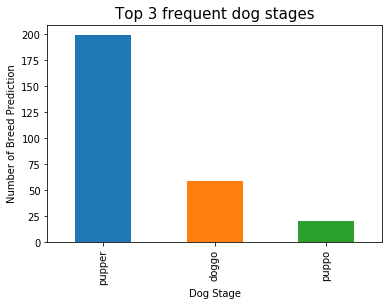

In [84]:
tweet_final['stage'].value_counts()[0:3].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Breed Prediction')
plt.title('Top 3 frequent dog stages', size=15)
plt.xlabel('Dog Stage')
plt.plot();

**Most of the dogs have pupper, doggo and puppo as their stages**

### Part II: Visualizing the 5 most frequent dog names

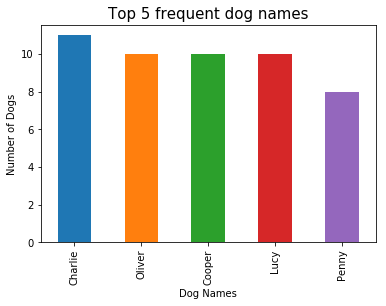

In [69]:
tweet_final['name'].value_counts()[2:7].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Dogs')
plt.title('Top 5 frequent dog names', size=15)
plt.xlabel('Dog Names')
plt.plot();

**Most of the dogs are named Charlie, Lucy, Oliver, Cooper and Penny**

### Part III: The Distribution of Favorite Count compare to Retweet Count

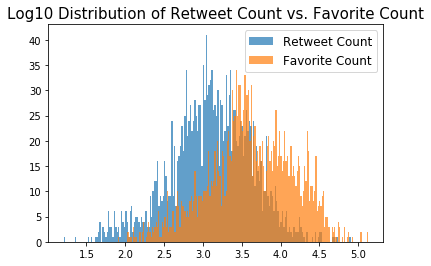

In [74]:
log_retweet = tweet_final['retweet_count'].apply(lambda x: np.log10(x))
log_favorite = tweet_final['favorite_count'].apply(lambda x: np.log10(x))
plt.hist(log_retweet, alpha=0.7, bins=200, label='Retweet Count')
plt.hist(log_favorite, alpha=0.7, bins=200, label='Favorite Count')
plt.title('Log10 Distribution of Retweet Count vs. Favorite Count', size=15)
plt.legend(loc='upper right', fontsize=12)
plt.savefig('retweet_favorite_dist');

**We can found that the distribution of favorite_count is located to the right of the distribution of retweet_count. Therefore, people favor the tweets more often than retweet them.**